In [13]:
from benji_girgs import *
from typing import List, Tuple, Union
import random
from scipy.spatial.distance import pdist, squareform
import sys


graph_folder = '../nemo-eva/data/socfb/'
path = graph_folder + 'socfb-Brown11.SpaceOne'
g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)

data_dir = '/Users/benjidayan/Documents/GIRG_data/'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ImportError: Error importing girgs CPP library wrapper.

In [8]:
nk.overview(g)

Network Properties:
nodes, edges			8600, 384526
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.010399
clustering coefficient		0.217382
min/max/avg degree		1, 1075, 89.424651
degree assortativity		0.069552
number of connected components	8
size of largest component	8586 (99.84 %)


In [11]:
n = 1000
d = 2
tau=2.2
alpha = 3.0

weights = generateWeights(n, tau)
pts = generatePositions(n, d)
wbar = (tau-1)/(tau-2)
# pts = pts * (wbar**(1/d))
edges = generateEdges(weights, pts, alpha)
g = nk.nxadapter.nx2nk(nx.from_numpy_array(edges))
nk.overview(g)

Network Properties:
nodes, edges			1000, 32955
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.065976
clustering coefficient		0.739616
min/max/avg degree		13, 999, 65.910000
degree assortativity		-0.232932
number of connected components	1
size of largest component	1000 (100.00 %)


In [12]:
weights = girgs.generateWeights(n, tau)
pts = girgs.generatePositions(n, d)
edges = girgs.generateEdges(weights, pts, alpha)
g = nk.nxadapter.nx2nk(nx.from_edgelist(edges))

NameError: name 'girgs' is not defined

In [30]:
weights
outer = np.outer(weights, weights)
pts2 = pts * (wbar**(1/d))

array([12.20879763, 14.77982027,  2.79052929,  1.13025288,  1.03850682,
        1.34442409,  2.3777099 , 12.13467112,  1.60793414,  1.17657087])

In [22]:
dists = get_dists_julia(pts, n**(1/d))
dists2 = get_dists_julia(pts2, n**(1/d))

array([[ 0.        ,  1.47087141,  0.02734375,  0.21875   , -1.20100359,
         0.71875   ,  0.62890625,  0.3984375 ,  0.35693359,  1.33024641],
       [ 1.47087141,  0.        ,  1.44352766,  1.47265625,  0.49235579,
         1.39274641,  1.00798079,  1.0390625 ,  1.4375    ,  1.00878906],
       [ 0.02734375,  1.44352766,  0.        ,  0.55680891,  0.51171875,
         0.05078125,  0.6015625 , -0.95490984,  0.00602766,  1.35759016],
       [ 0.21875   ,  1.47265625,  0.55680891,  0.        ,  0.04509016,
         0.296875  ,  0.84765625, -0.14436296,  0.25212141,  1.11149641],
       [-1.20100359,  0.49235579,  0.51171875,  0.04509016,  0.        ,
        -1.27912859, -0.06819109,  0.27197266,  1.23242188, -3.03303484],
       [ 0.71875   ,  1.39274641,  0.05078125,  0.296875  , -1.27912859,
         0.        ,  0.55078125,  1.1171875 ,  0.36181641,  1.40837141],
       [ 0.62890625,  1.00798079,  0.6015625 ,  0.84765625, -0.06819109,
         0.55078125,  0.        , -0.03108171

In [27]:
p_uv = np.divide(outer, dists**d) 

NameError: name 'outer' is not defined

In [26]:
x = np.arange(9).reshape(3, 3)
x
x**2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

In [23]:
dists**d

array([[0.00000000e+00, 2.16346271e+00, 7.47680664e-04, 4.78515625e-02,
        1.44240962e+00, 5.16601562e-01, 3.95523071e-01, 1.58752441e-01,
        1.27401590e-01, 1.76955551e+00],
       [2.16346271e+00, 0.00000000e+00, 2.08377211e+00, 2.16871643e+00,
        2.42414219e-01, 1.93974256e+00, 1.01602526e+00, 1.07965088e+00,
        2.06640625e+00, 1.01765537e+00],
       [7.47680664e-04, 2.08377211e+00, 0.00000000e+00, 3.10036162e-01,
        2.61856079e-01, 2.57873535e-03, 3.61877441e-01, 9.11852802e-01,
        3.63326871e-05, 1.84305104e+00],
       [4.78515625e-02, 2.16871643e+00, 3.10036162e-01, 0.00000000e+00,
        2.03312254e-03, 8.81347656e-02, 7.18521118e-01, 2.08406656e-02,
        6.35652055e-02, 1.23542427e+00],
       [1.44240962e+00, 2.42414219e-01, 2.61856079e-01, 2.03312254e-03,
        0.00000000e+00, 1.63616995e+00, 4.65002473e-03, 7.39691257e-02,
        1.51886368e+00, 9.19930034e+00],
       [5.16601562e-01, 1.93974256e+00, 2.57873535e-03, 8.81347656e-02,
   

In [45]:
n = 1000
d = 2
tau=2.01
alpha = 3.0

g, edges, weights, pts = generate_GIRG_nk(n=n, d=d, tau=tau, alpha=alpha)
nk.overview(g)

Network Properties:
nodes, edges			1000, 56110
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.112332
clustering coefficient		0.789248
min/max/avg degree		23, 999, 112.220000
degree assortativity		-0.343046
number of connected components	1
size of largest component	1000 (100.00 %)


In [57]:
n = 1000
d = 2
tau=2.01
alpha = 3.0

weights = generateWeights(n, tau)
pts = generatePositions(n, d)
# wbar = (tau-1)/(tau-2)
wbar = np.mean(weights)
pts = pts * (wbar**(1/d))

outer = np.outer(weights, weights)
n, d = pts.shape
dists = get_dists_julia(pts, (n*wbar)**(1/d))
p_uv = np.divide(outer, dists**d)  
p_uv = np.minimum(p_uv, 1)
p_uv = np.power(p_uv, alpha)

probs = p_uv
unif_mat = np.random.uniform(size=probs.shape)
edges = np.triu((unif_mat < probs).astype(np.uint), 1)

np.mean(weights)
(tau-1)/(tau-2)

g = nk.nxadapter.nx2nk(nx.from_numpy_matrix(edges))
nk.overview(g)

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_23587/4060960172.py:15: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


7.222299985149082

101.00000000000213

Network Properties:
nodes, edges			1000, 13181
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026388
clustering coefficient		0.814822
min/max/avg degree		1, 927, 26.362000
degree assortativity		-0.258369
number of connected components	1
size of largest component	1000 (100.00 %)


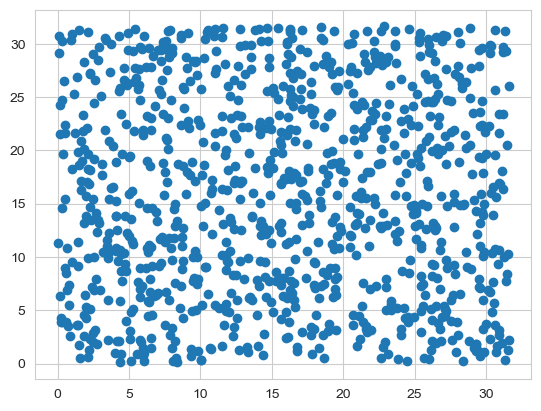

In [5]:
plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts])

In [39]:
n=100
d=2
edges, weights, pts = generate_GIRG(n=n, d=d)
g = nk.nxadapter.nx2nk(nx.from_numpy_matrix(edges))
nk.overview(g)

Network Properties:
nodes, edges			100, 1844
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.372525
clustering coefficient		0.699643
min/max/avg degree		14, 99, 36.880000
degree assortativity		-0.246357
number of connected components	1
size of largest component	100 (100.00 %)


In [42]:
n=1000
d=2
edges, weights, pts = generate_GIRG(n=n, d=d)
g = nk.nxadapter.nx2nk(nx.from_numpy_matrix(edges))
nk.overview(g)

Network Properties:
nodes, edges			1000, 46903
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.093900
clustering coefficient		0.703794
min/max/avg degree		22, 999, 93.806000
degree assortativity		-0.275110
number of connected components	1
size of largest component	1000 (100.00 %)


In [89]:
n=1000
d=2
edges, weights, pts = generate_GIRG(n=n, d=d)
g = nk.nxadapter.nx2nk(nx.from_numpy_matrix(edges))
np.mean(weights)
(tau-1)/(tau-2)
nk.overview(g)

clg = nk.generators.ChungLuGenerator(weights).generate()
nk.overview(clg)

3.6795428009321887

5.999999999999996

Network Properties:
nodes, edges			1000, 36861
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.073796
clustering coefficient		0.653272
min/max/avg degree		16, 998, 73.722000
degree assortativity		-0.197874
number of connected components	1
size of largest component	1000 (100.00 %)
Network Properties:
nodes, edges			1000, 1589
directed?			False
weighted?			False
isolated nodes			252
self-loops			0
density				0.003181
clustering coefficient		0.080960
min/max/avg degree		0, 163, 3.178000
degree assortativity		0.254621
number of connected components	264
size of largest component	724 (72.40 %)


In [103]:

weights = generateWeights(2000, 2.2)
clg = nk.generators.ChungLuGenerator(weights).generate()
nk.overview(clg)

Network Properties:
nodes, edges			2000, 3950
directed?			False
weighted?			False
isolated nodes			492
self-loops			0
density				0.001976
clustering coefficient		0.097086
min/max/avg degree		0, 222, 3.950000
degree assortativity		0.288415
number of connected components	513
size of largest component	1467 (73.35 %)


In [3]:
from tqdm import tqdm

In [10]:
def avg_degree(g):
    return np.mean(nk.centrality.DegreeCentrality(g).run().scores())

n = 1000
tau = 2.2
avg_degrees = []
for _ in tqdm(range(100)):
    weights = generateWeights(n, tau)
    clg = nk.generators.ChungLuGenerator(weights).generate()
    avg_degrees.append(avg_degree(clg))

np.mean(avg_degrees)
np.std(avg_degrees)
np.max(avg_degrees)

100%|██████████| 100/100 [00:00<00:00, 1597.75it/s]


3.61

0.3399256389271042

4.496

In [23]:

n = 1000
tau = 2.2
avg_degrees = []
for _ in tqdm(range(100)):
    edges, weights, pts = generate_GIRG(n=n, tau=tau)
    g = nk.nxadapter.nx2nk(nx.from_numpy_matrix(edges))
    avg_degrees.append(avg_degree(g))

np.mean(avg_degrees)
np.std(avg_degrees)
np.max(avg_degrees)

  0%|          | 0/100 [00:00<?, ?it/s]/Users/benjidayan/My Drive/eth_courses/GIRG/nemo-eva/benji_girgs.py:174: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


145.53206

8.111176055073642

163.228

In [3]:
n = 10000
d = 2
tau=2.2
alpha = 3.0
%time edges, weights, pts = generate_GIRG(n=n, tau=tau, alpha=alpha, d=d)

CPU times: user 2.64 s, sys: 820 ms, total: 3.46 s
Wall time: 3.47 s


In [15]:
def avg_degree(g):
    return np.mean(nk.centrality.DegreeCentrality(g).run().scores())

n = 10000
tau = 2.2
avg_degrees = []
for _ in tqdm(range(100)):
    weights = generateWeights(n, tau)
    clg = nk.generators.ChungLuGenerator(weights).generate()
    avg_degrees.append(avg_degree(clg))

np.mean(avg_degrees)
np.std(avg_degrees)
np.max(avg_degrees)

100%|██████████| 100/100 [00:00<00:00, 218.18it/s]


4.125584

0.30149820918871145

4.6482

In [22]:
def avg_degree(g):
    return np.mean(nk.centrality.DegreeCentrality(g).run().scores())

n = 10000
tau = 2.2
avg_degrees = []
for _ in tqdm(range(100)):
    weights = generateWeights(n, tau)
    clg = nk.generators.ChungLuGenerator(weights).generate()
    avg_degrees.append(avg_degree(clg))

np.mean(avg_degrees)
np.std(avg_degrees)
np.max(avg_degrees)

100%|██████████| 100/100 [00:00<00:00, 147.50it/s]


4.119708

0.3019598323221153

4.6502

In [46]:
np.mean(weights)
(tau-1)/(tau-2)

4.882165297672256

5.999999999999996

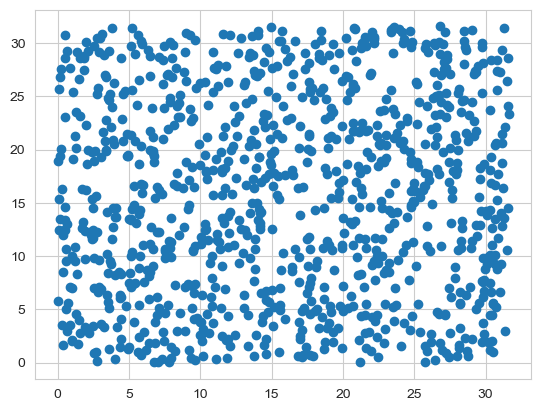

In [ ]:
plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts])

<Figure size 800x400 with 0 Axes>

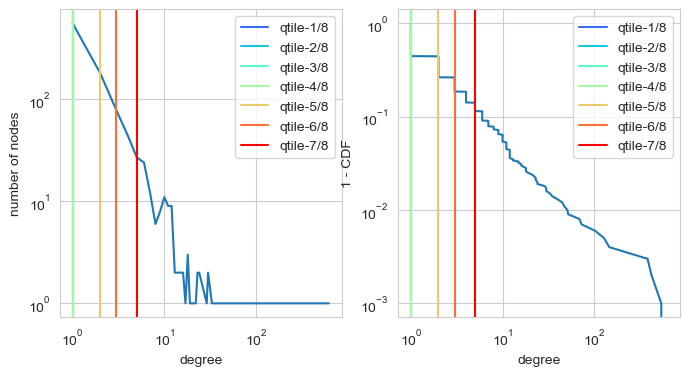

In [8]:
plt.figure(figsize=(8, 4))
plot_degree_dist(np.floor(weights).astype(np.int64), vlines=8)

In [14]:
for _ in range(2):
    edges, weights, pts = generate_GIRG(n=10000)
    g = nk.nxadapter.nx2nk(nx.from_numpy_matrix(edges))
    nk.overview(g)
    print('')

/Users/benjidayan/My Drive/eth_courses/GIRG/nemo-eva/benji_girgs.py:173: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			10000, 1186660
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.023736
clustering coefficient		0.644094
min/max/avg degree		47, 9999, 237.332000
degree assortativity		-0.195504
number of connected components	1
size of largest component	10000 (100.00 %)

Network Properties:
nodes, edges			10000, 1242039
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.024843
clustering coefficient		0.660817
min/max/avg degree		51, 9998, 248.407800
degree assortativity		-0.208505
number of connected components	1
size of largest component	10000 (100.00 %)



In [13]:
tau = 2.2
(tau-1)/(tau-2)

5.999999999999996

In [15]:
for _ in range(2):
    edges, weights, pts = generate_GIRG(n=1000)
    g = nk.nxadapter.nx2nk(nx.from_numpy_matrix(edges))
    nk.overview(g)
    print('')

Network Properties:
nodes, edges			1000, 75101
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.150352
clustering coefficient		0.664511
min/max/avg degree		45, 999, 150.202000
degree assortativity		-0.285905
number of connected components	1
size of largest component	1000 (100.00 %)

Network Properties:
nodes, edges			1000, 76261
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.152675
clustering coefficient		0.663625
min/max/avg degree		44, 999, 152.522000
degree assortativity		-0.285555
number of connected components	1
size of largest component	1000 (100.00 %)

